   ### Author : Pranay Waghmare
   ### TSF Data Science and Business Analytics Internship TASK 6
   ### Prediction using Decsion Tree Algorithm

### Objective

● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

### Importing the required packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

### Reading and Importing the data 
Data can be found at https://bit.ly/3kXTdox

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
iris_dataset =  pd.read_csv('/Iris.csv')

In [5]:
iris_dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Pre-processing

X as the Feature Matrix 
y as the response vector (target)

In [7]:
x = iris_dataset.iloc[:, [1, 2, 3, 4]].values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Target Variable

In [8]:
y = iris_dataset["Species"]
y[0:5]


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Setting up the Decision Tree

 We will be using train/test split on our decision tree. 
 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
TrainX, TestX, TrainY, TestY, = train_test_split(x, y, test_size=0.2, random_state=3)

### Modeling
We will first create an instance of the DecisionTreeClassifier called IrisTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [11]:
IrisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
IrisTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Fit the data to the model

In [12]:
IrisTree.fit(TrainX, TrainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction
Let's make some predictions on the testing dataset and store it into a variable called predTree.

In [13]:
predTree = IrisTree.predict(TestX)

In [14]:
print(predTree[0:5])
print(TestY[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: Species, dtype: object


### Evaluation
Next, let's import metrics from sklearn and check the accuracy of our model.

In [15]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", "%.2f" % metrics.accuracy_score(TestY, predTree))

DecisionTrees's Accuracy:  1.00


### Visualization


In [19]:
#You might need to uncomment and install the pydotplus and graphviz 

# Install required libraries
# !pip install pydotplus
# !pip install graphviz 
# # Install required libraries
# !pip install pydotplus
!pip install pydotplus
!apt-get install graphviz -y


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [21]:
from  io import StringIO
import graphviz
import pydotplus
from IPython.display import Image  
import matplotlib.image as mpimg
from sklearn import tree

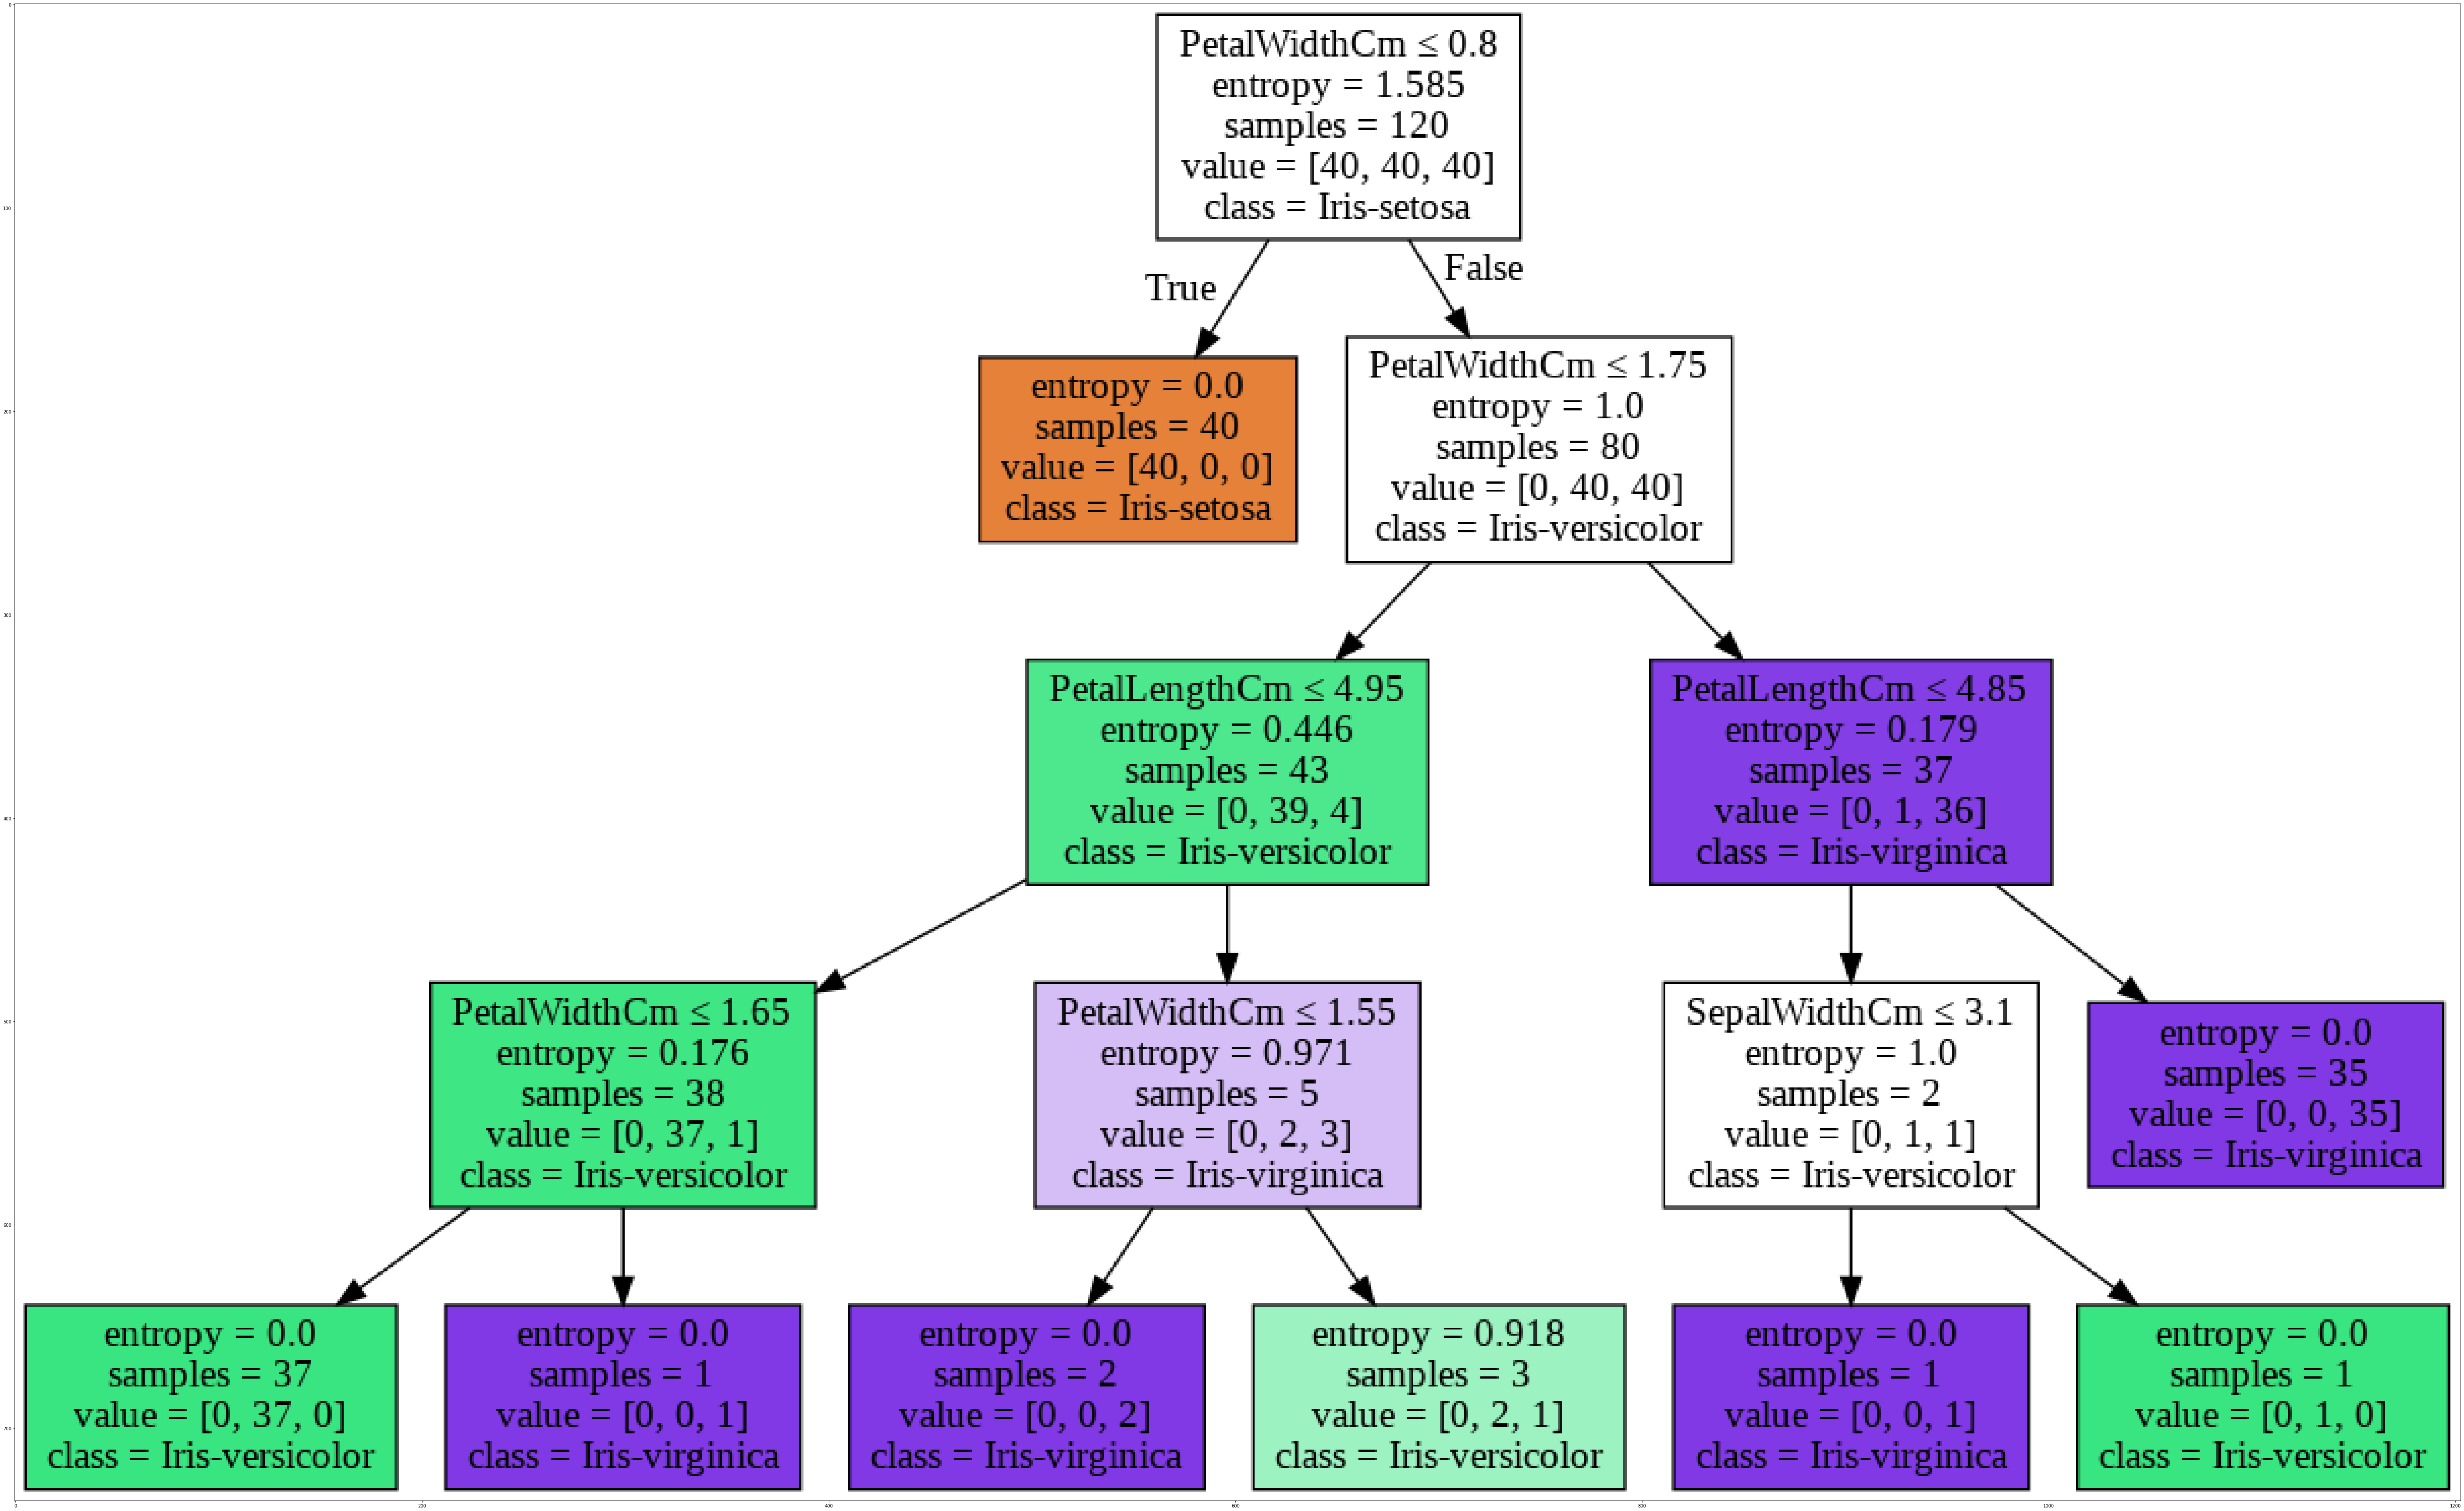

In [23]:
dot_data = StringIO()
filename = "Iristree.png"
featureNames = iris_dataset.columns[1:5]
out=tree.export_graphviz(IrisTree, feature_names=featureNames, out_file=dot_data, class_names= np.unique(TrainY), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')